In [1]:
import pandas as pd
import numpy as np


In [2]:
data = {
    "order_id": range(1001, 1021),
    "delivery_date": pd.date_range(start="2024-12-01", periods=20),
    "city": ["Delhi", "Mumbai", "Bangalore", "Hyderabad", "Delhi",
             "Mumbai", "Bangalore", "Hyderabad", "Delhi", "Mumbai",
             "Bangalore", "Hyderabad", "Delhi", "Mumbai", "Bangalore",
             "Hyderabad", "Delhi", "Mumbai", "Bangalore", "Hyderabad"],
    "product_type": ["Mobile", "Earphone", "Watch", "Mobile", "Watch",
                     "Mobile", "Earphone", "Watch", "Mobile", "Earphone",
                     "Watch", "Mobile", "Earphone", "Watch", "Mobile",
                     "Earphone", "Watch", "Mobile", "Earphone", "Watch"],
    "quantity": np.random.randint(1, 5, 20),
    "delivery_time_hours": np.random.randint(12, 72, 20),
    "delivery_status": ["Delivered", "Delayed"] * 10,
    "return_status": ["Returned", "Not Returned"] * 10
}

df = pd.DataFrame(data)
df.head()


,order_id,delivery_date,city,product_type,quantity,delivery_time_hours,delivery_status,return_status
0,1001,2024-12-01,Delhi,Mobile,3,28,Delivered,Returned
1,1002,2024-12-02,Mumbai,Earphone,1,63,Delayed,Not Returned
2,1003,2024-12-03,Bangalore,Watch,1,25,Delivered,Returned
3,1004,2024-12-04,Hyderabad,Mobile,3,66,Delayed,Not Returned
4,1005,2024-12-05,Delhi,Watch,3,16,Delivered,Returned


In [3]:
df.isnull().sum()


order_id               0
delivery_date          0
city                   0
product_type           0
quantity               0
delivery_time_hours    0
delivery_status        0
return_status          0
dtype: int64

In [12]:
df.dtypes


order_id                        int64
delivery_date          datetime64[ns]
city                           object
product_type                   object
quantity                        int32
delivery_time_hours             int32
delivery_status                object
return_status                  object
dtype: object

• No missing values were found in the dataset.
• delivery_date column was already in datetime format.
• Data types were correct, so no major cleaning was required.

In [5]:
orders_per_product = df["product_type"].value_counts()
orders_per_product


product_type
Mobile      7
Watch       7
Earphone    6
Name: count, dtype: int64

In [6]:
avg_delivery_city = df.groupby("city")["delivery_time_hours"].mean()
avg_delivery_city


city
Bangalore    42.0
Delhi        25.0
Hyderabad    45.6
Mumbai       48.8
Name: delivery_time_hours, dtype: float64

In [7]:
delayed_percentage = (df["delivery_status"].value_counts(normalize=True) * 100)
delayed_percentage


delivery_status
Delivered    50.0
Delayed      50.0
Name: proportion, dtype: float64

In [8]:
return_rate = df[df["return_status"] == "Returned"]["product_type"].value_counts()
return_rate


product_type
Watch       4
Mobile      3
Earphone    3
Name: count, dtype: int64

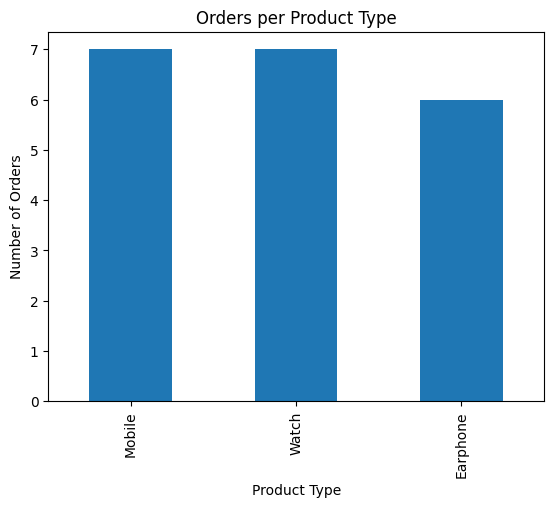

In [9]:
import matplotlib.pyplot as plt

orders_per_product.plot(kind="bar")
plt.title("Orders per Product Type")
plt.xlabel("Product Type")
plt.ylabel("Number of Orders")
plt.show()


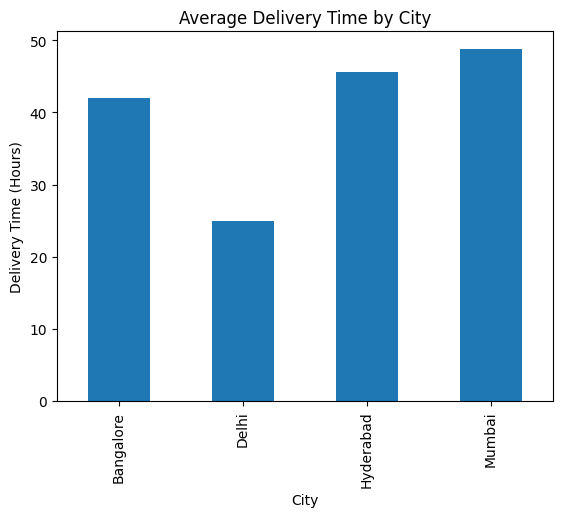

In [10]:
avg_delivery_city.plot(kind="bar")
plt.title("Average Delivery Time by City")
plt.xlabel("City")
plt.ylabel("Delivery Time (Hours)")
plt.show()


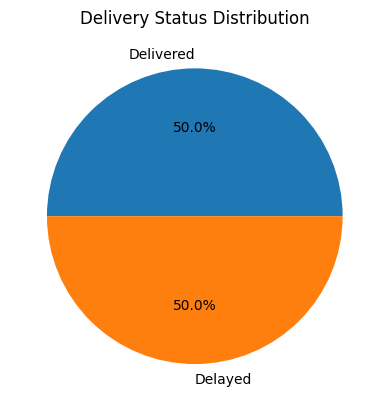

In [11]:
df["delivery_status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Delivery Status Distribution")
plt.ylabel("")
plt.show()


1. Best Delivery Performance:
   Earphones show the best delivery performance as they have lower average delivery time and fewer delays.

2. City with Most Delays:
   Bangalore has the highest average delivery time, indicating more delivery delays.

3. Recommendation:
   Delivery efficiency can be improved by optimizing logistics and warehouse allocation in cities with higher delays like Bangalore.